In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy as c
import matplotlib as m
import pickle as pkl
import sklearn as skl
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split as splt
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as cfm
from tqdm import tqdm

/home/jayakrishnak/softwares/anaconda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def get_f1_score(cmt, otype='all'):
    f1s = np.zeros((len(cmt)))
    for i in range(len(cmt)):
        d1 = cmt[i,i] / cmt[i].sum()
        d2 = cmt[i,i] / cmt[:,i].sum()
        f1s[i] = (2 * d1 * d2) / (d1 + d2)
    if otype == 'all':
        return f1s
    elif otype == 'min':
        return np.min(f1s)
    elif otype == 'av':
        return np.mean(f1s)
    else:
        return ValueError

# Protein

In [75]:
fpr = np.load('../../8_protein_conformations_and_apo_states/4_rf/features.npy')
lpr = np.load('../../8_protein_conformations_and_apo_states/4_rf/labels.npy')

In [76]:
rpr =  np.load('../../8_protein_conformations_and_apo_states/4_rf/randoms.npy').astype(int)
rpr = np.insert(rpr, 0, 0)

In [77]:
apr = np.zeros((len(rpr)))
cpr = np.zeros((len(rpr), 3))
clo_top95 = []
cutt = 0.95
for i in tqdm(range(len(rpr))):
    if i == 0:
        clf_ = pkl.load(open('../../8_protein_conformations_and_apo_states/4_rf/model_0.pkl', 'rb'))
    else:
        clf_ = pkl.load(open(f'../../8_protein_conformations_and_apo_states/4_rf/1_cross_validation/model_{i}.pkl', 'rb'))
    
    _, xtest, _, ytest = splt(fpr, lpr, test_size=0.3, random_state=rpr[i])
    _ = 0+1
    
    pred_ = clf_.predict(xtest)
    
    apr[i] = acc(ytest, pred_)
    cpr[i] = get_f1_score( cfm(ytest, pred_) )
    
    fimp = clf_.feature_importances_
    clo_top95.append( fimp )
    
    xtest, ytest, pred_ = 0, 0, 0
    
clo_top95 = np.array(clo_top95)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [49:36<00:00, 59.53s/it]


In [78]:
fpr, lpr = 0, 0

In [59]:
np.save('accuracies/apr.npy', apr)
np.save('accuracies/cpr.npy', cpr)

In [85]:
np.save('saved_files/clo_top95.npy', clo_top95)

In [60]:
np.mean(apr)

0.9978971197366028

In [61]:
np.std(apr)

5.4362388074779044e-05

In [62]:
np.mean(np.min(cpr, axis=1))

0.9853794112480034

In [63]:
np.std(np.min(cpr, axis=1))

0.0003844490434754958

# binding

In [79]:
fbinding = np.load('features.npy')
lbinding = np.load('labels.npy')

In [80]:
rbinding = np.load('randoms.npy').astype(int)
rbinding = np.insert(rbinding, 0, 0)

In [81]:
abinding = np.zeros((len(rbinding)))
cbinding = np.zeros((len(rbinding), 2))
bind_top95 = []

for i in tqdm(range(len(rbinding))):
    if i == 0:
        clf_ = pkl.load(open('model0.pkl', 'rb'))
    else:
        clf_ = pkl.load(open(f'1_cross_validation/model_{i}.pkl', 'rb'))
    
    _, xtest, _, ytest = splt(fbinding, lbinding, test_size=0.3, random_state=rbinding[i])
    _ = 0+1
    
    pred_ = clf_.predict(xtest)
    
    abinding[i] = acc(ytest, pred_)
    cbinding[i] = get_f1_score( cfm(ytest, pred_) )
    
    fimp = clf_.feature_importances_
    bind_top95.append( fimp )
    
    xtest, ytest, pred_ = 0, 0, 0
    
bind_top95 = np.array(bind_top95)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [1:34:39<00:00, 113.59s/it]


In [83]:
fbinding, lbinding = 0, 0

In [80]:
np.save('accuracies/abinding.npy', abinding)
np.save('accuracies/cbinding.npy', cbinding)

In [84]:
np.save('saved_files/bind_top95.npy', bind_top95)

## plotting

In [3]:
abinding = np.load('accuracies/abinding.npy')
cbinding = np.min(np.load('accuracies/cbinding.npy'), axis=1)
apr = np.load('accuracies/apr.npy')
cpr = np.min(np.load('accuracies/cpr.npy'), axis=1)

In [4]:
nreplicas=50

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


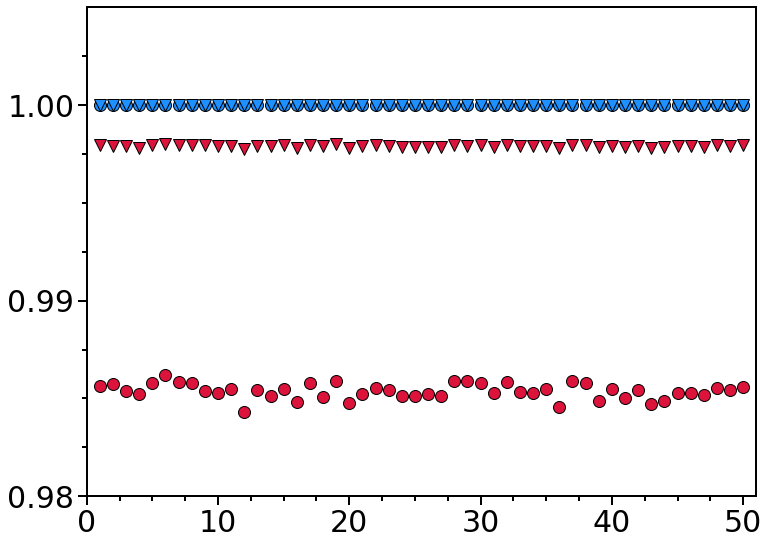

In [17]:
fig, ax = plt.subplots(1, figsize=(12,9))
#
ax.plot(np.arange(nreplicas)+1, cbinding, 'o', color='dodgerblue', markersize=12, mec='black')
ax.plot(np.arange(nreplicas)+1, cpr, 'o', color='crimson', markersize=12, mec='black')
#
ax.plot(np.arange(nreplicas)+1, abinding, 'v', color='dodgerblue', markersize=12, mec='black')
ax.plot(np.arange(nreplicas)+1, apr, 'v', color='crimson', markersize=12, mec='black')
#
ax.set_xlim(0,51)
ax.set_ylim(0.98,1.005)
ax.tick_params(labelsize=30, length=9, width=2)
ax.spines[:].set_linewidth(2)
ax.set_yticks([0.98, 0.99, 1.00])
ax.xaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.yaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
leg=ax.legend(ncol=2, fontsize=24)
leg.get_frame().set_alpha(0)
#
plt.savefig('accuracies/accuracies.png')
plt.show()

In [24]:
np.mean(apr), np.std(apr)

(0.9978971197366028, 5.4362388074779044e-05)

In [23]:
np.mean(cpr), np.std(cpr)

(0.9853794112480034, 0.0003844490434754958)

In [37]:
np.mean(abinding), np.std(abinding)

(0.9999997283436861, 4.63112271204665e-07)

In [38]:
np.mean(cbinding), np.std(cbinding)

(0.9999996666927907, 5.683041728231374e-07)

In [31]:
clo_top95 = np.load('saved_files/clo_top95.npy')
bind_top95 = np.load('saved_files/bind_top95.npy')

In [32]:
means_clo_top95 = np.mean(clo_top95, axis=0)
std_clo_top95 = np.std(clo_top95, axis=0)

inds = means_clo_top95.argsort()[::-1]
means_clo_top95 = means_clo_top95[inds]
std_clo_top95 = std_clo_top95[inds]

cumsum_clo_top95 = np.cumsum(means_clo_top95)

In [33]:
means_bind_top95 = np.mean(bind_top95, axis=0)
std_bind_top95 = np.std(bind_top95, axis=0)

inds = means_bind_top95.argsort()[::-1]
means_bind_top95 = means_bind_top95[inds]
std_bind_top95 = std_bind_top95[inds]

cumsum_bind_top95 = np.cumsum(means_bind_top95)

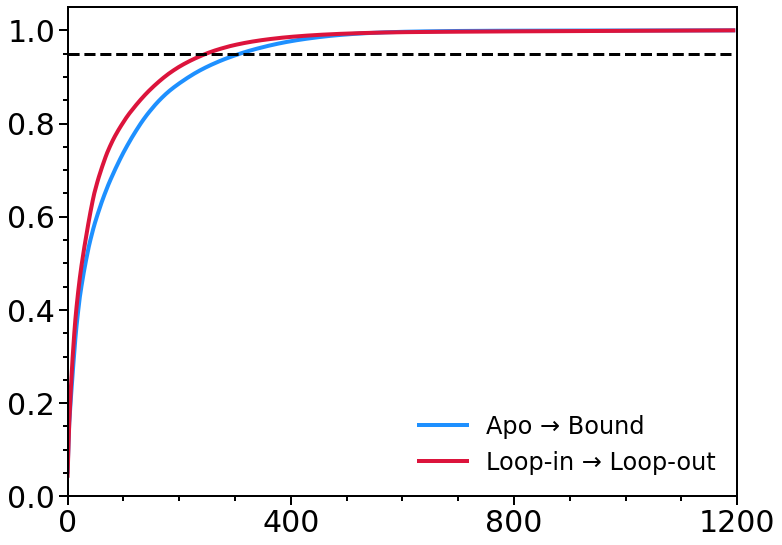

In [36]:
fig, ax = plt.subplots(1, figsize=(12,9))
ax.plot(cumsum_bind_top95, color='dodgerblue', lw=4, label=u'Apo \u2192 Bound')
ax.plot(cumsum_clo_top95, color='crimson', lw=4, label=u'Loop-in \u2192 Loop-out')
ax.plot([0,1200], [0.95,0.95], '--', lw=3, color='black')
ax.set_xlim(0,1200)
ax.set_ylim(0,1.05)
ax.tick_params(labelsize=30, length=9, width=2)
ax.spines[:].set_linewidth(2)
# ax.set_yticks([0.98, 0.99, 1.00])
ax.set_xticks([0,400,800,1200])
ax.xaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.yaxis.set_minor_locator(m.ticker.AutoMinorLocator(4))
ax.tick_params(which='minor', length=5, width=2)
leg=ax.legend(fontsize=24, loc=4)
leg.get_frame().set_alpha(0)
#
plt.savefig('accuracies/fimp.pdf')
plt.show()